# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [53]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [54]:
def f(x):
    return x*x*numpy.sin(x)
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE

Ensure your function works with numpy arrays:

In [55]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [56]:
def g(x):
    return 2*x*numpy.sin(x)+(2-x*x)*numpy.cos(x)-2
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE

Check your solution with the same numpy array:

In [57]:
assert g(0) == 0.

In [58]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [59]:
def integrate_analytic(xmin, xmax):
    return g(xmax)-g(xmin)
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE

Check your analytic function:

In [60]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [93]:
def integrate_numeric(xmin, xmax, N):
    N=N+1
    h=(xmax-xmin)/(2*N-2)
    integral=(f(xmin)+f(xmax))*h/3
    for i in range(1,2*N-2):
        
        if i % 2==0:
     
            integral=integral+2*f(xmin+h*i)*h/3
        else:
            integral=integral+4*f(xmin+h*i)*h/3
    return integral
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE

In [88]:
integrate_numeric(xmin=0, xmax=4, N=1)

1


1.6266126028560368

In [89]:
integrate_numeric(xmin=0, xmax=4, N=2)

1
2
2
3


-1.2208785651800156

Make sure you have implemented Simpson's rule correctly:

In [90]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

1


In [94]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Simpson Error')

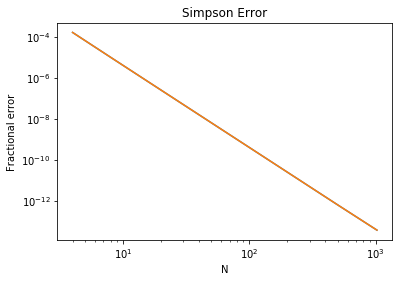

In [123]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1) # Define reference value from analytical solution
result=numpy.zeros(9)
for i in range(0,9):
    result_numeric=integrate_numeric(x0,x1,panel_counts[i])
    result[i]=(result_analytic-result_numeric)/result_analytic

plt.plot(panel_counts,result)
plt.loglog(panel_counts,result)
plt.xlabel("N")
plt.ylabel("Fractional error")
plt.title("Simpson Error")

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The bigger the number of panels the more accuracy this method is going to have. However, as shown in the first assignment, if we go beyond computer's accuracy (because there is a limited amount of number the computer can deal with), then we starting having some problems with round-off, and the definition that dx tends to 0 does not apply.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

It will be also getting more accurated when we have a bigger panel count, but not as faster as Simpson's rule.